In [7]:
#import the libraries
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [8]:
dataLTT=pd.read_csv("/content/LabTAT.csv")
dataLTT

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0          185.35        165.53        176.70        166.13
1          170.49        185.91        198.45        160.79
2          192.77        194.92        201.23        185.18
3          177.33        183.00        199.61        176.42
4          193.41        169.57        204.63        152.60
..            ...           ...           ...           ...
115        178.49        170.66        193.80        172.68
116        176.08        183.98        215.25        177.64
117        202.48        174.54        203.99        170.27
118        182.40        197.18        194.52        150.87
119        182.09        215.17        221.49        162.21

[120 rows x 4 columns]

In [9]:
dataLTT.describe()

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
count    120.000000    120.000000    120.000000     120.00000
mean     178.361583    178.902917    199.913250     163.68275
std       13.173594     14.957114     16.539033      15.08508
min      138.300000    140.550000    159.690000     124.06000
25%      170.335000    168.025000    188.232500     154.05000
50%      178.530000    178.870000    199.805000     164.42500
75%      186.535000    189.112500    211.332500     172.88250
max      216.390000    217.860000    238.700000     205.18000

In [10]:
dataLTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


#GRAPHS

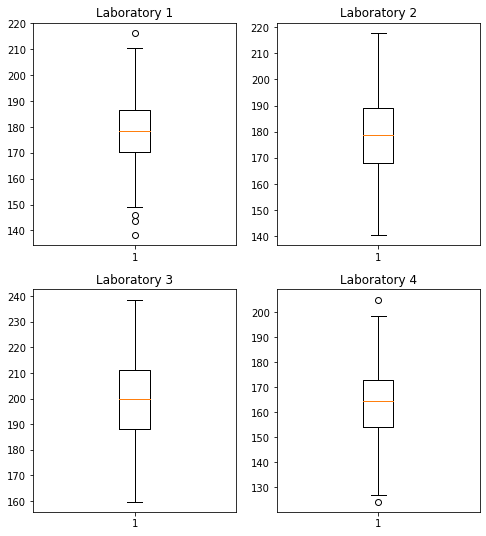

In [12]:
plt.subplots(figsize = (8,9))
plt.subplot(221)
plt.boxplot(dataLTT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(dataLTT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(dataLTT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(dataLTT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

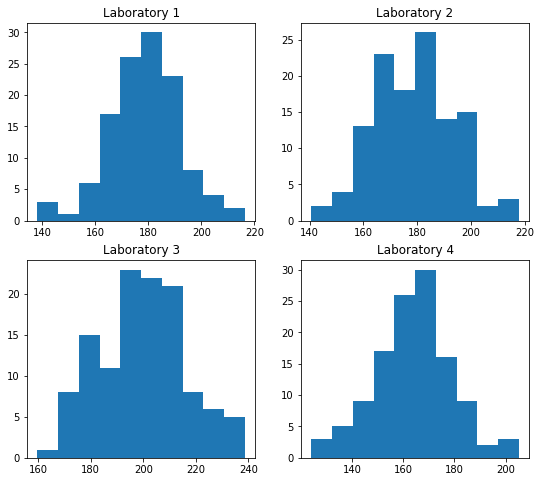

In [14]:
plt.subplots(figsize = (9,8))
plt.subplot(221)
plt.hist(dataLTT['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(dataLTT['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(dataLTT['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(dataLTT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

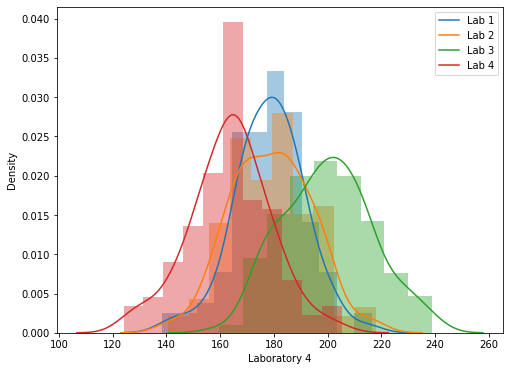

In [16]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4']
sns.distplot(dataLTT['Laboratory 1'],hist = True)
sns.distplot(dataLTT['Laboratory 2'],hist = True)
sns.distplot(dataLTT['Laboratory 3'],hist = True)
sns.distplot(dataLTT['Laboratory 4'],hist = True)
plt.legend(labels)

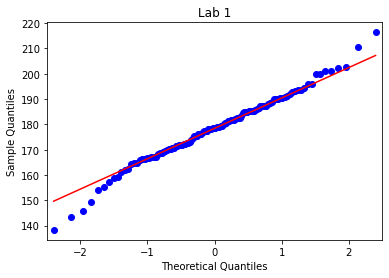

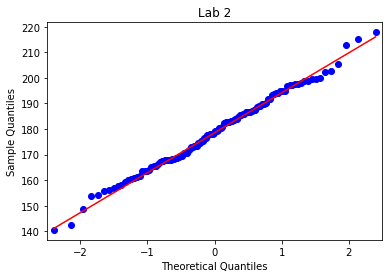

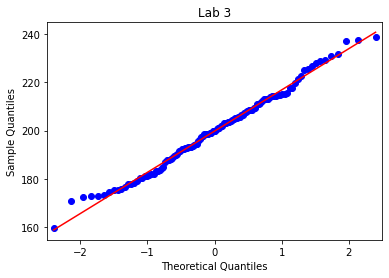

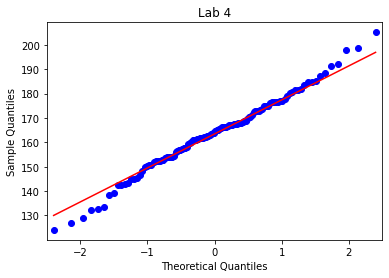

In [20]:
sm.qqplot(dataLTT["Laboratory 1"], line = 'q')
plt.title('Lab 1')
sm.qqplot(dataLTT["Laboratory 2"], line = 'q')
plt.title('Lab 2')
sm.qqplot(dataLTT["Laboratory 3"], line = 'q')
plt.title('Lab 3')
sm.qqplot(dataLTT["Laboratory 4"], line = 'q')
plt.title('Lab 4')
plt.show()

In [21]:
Lab1=pd.Series(dataLTT.iloc[:,0])
Lab1.head()

0    185.35
1    170.49
2    192.77
3    177.33
4    193.41
Name: Laboratory 1, dtype: float64

In [22]:
Lab2=pd.Series(dataLTT.iloc[:,1])
Lab2.head()

0    165.53
1    185.91
2    194.92
3    183.00
4    169.57
Name: Laboratory 2, dtype: float64

In [23]:
Lab3=pd.Series(dataLTT.iloc[:,2])
Lab3.head()

0    176.70
1    198.45
2    201.23
3    199.61
4    204.63
Name: Laboratory 3, dtype: float64

In [24]:
Lab4=pd.Series(dataLTT.iloc[:,3])
Lab4.head()

0    166.13
1    160.79
2    185.18
3    176.42
4    152.60
Name: Laboratory 4, dtype: float64

In [25]:
test_statistic , pvalue = stats.f_oneway(Lab1,Lab2,Lab3,Lab4)
print('test_statistic =',test_statistic)
print('pvalue =',pvalue)

test_statistic = 118.70421654401437
pvalue = 2.1156708949992414e-57


#Cut - off Value

In [26]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, pvalue))
if pvalue <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


#TWO TAIL TEST

In [27]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, pvalue))
if pvalue <= alpha:
    print('rejecting Null Hypothesis as there is a significance difference between TAT of reports of the laboratories')
else:
    print('fail to reject Null hypothesis')

Significnace=0.025, p=0.000
rejecting Null Hypothesis as there is a significance difference between TAT of reports of the laboratories


#Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples